In [1]:
import torch
torch.set_default_tensor_type('torch.cuda.FloatTensor')

# Loading MNIST:

In [2]:
import torchvision as tv
mnist_train=tv.datasets.MNIST(root='./Data',train=True,download=True)
mnist_test=tv.datasets.MNIST(root='./Data',train=False,download=True)

In [3]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./Data
    Transforms (if any): None
    Target Transforms (if any): None

In [4]:
mnist_train[1]

(<PIL.Image.Image image mode=L size=28x28 at 0x7FEBCE83A3C8>,
 tensor(0, device='cpu'))

In [5]:
from PIL import Image
mnist_train[1][0].show()
print(mnist_train[1][1])

tensor(0, device='cpu')


# Tranforming in tensors and grayscale from 0 to 1:

In [6]:
import torchvision.transforms as transforms
transform = transforms.Compose(
    [transforms.Grayscale(num_output_channels=1),transforms.ToTensor()])

In [7]:
import torchvision as tv
mnist_train=tv.datasets.MNIST(root='./Data',train=True,download=True,transform=transform)
mnist_test=tv.datasets.MNIST(root='./Data',train=False,download=True,transform=transform)

In [8]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./Data
    Transforms (if any): Compose(
                             Grayscale(num_output_channels=1)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [9]:
mnist_test

Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./Data
    Transforms (if any): Compose(
                             Grayscale(num_output_channels=1)
                             ToTensor()
                         )
    Target Transforms (if any): None

# Image 0:

In [10]:
mnist_train[0][0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [11]:
mnist_train[0][0].size()

torch.Size([1, 28, 28])

In [12]:
mnist_train

Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./Data
    Transforms (if any): Compose(
                             Grayscale(num_output_channels=1)
                             ToTensor()
                         )
    Target Transforms (if any): None

In [13]:
to_pil = tv.transforms.ToPILImage()
img = to_pil(mnist_train[0][0])
img

Label:

In [14]:
mnist_train[0][1].cuda()

tensor(5)

28x28 images

# X matrix creation

In [15]:
X=[]
temp=[]
temp2=[1]
temp2=torch.FloatTensor(temp2)
for i in list(range(60000)):
    temp=mnist_train[i][0]
    temp=temp.view(-1,784)
    temp=torch.squeeze(temp)
    temp=torch.cat((temp2,temp))#add bias col
    X.append(temp)
X=torch.stack(X)

In [16]:
X

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.]], device='cpu')

In [17]:
X.size()

torch.Size([60000, 785])

# Y Matrix creation

In [18]:
def OneHotOriginal(tensor):
    #classes from 0 to 9
    label=tensor.item()
    if (label==0):
        out=[1,0,0,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==1):
        out=[0,1,0,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==2):
        out=[0,0,1,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==3):
        out=[0,0,0,1,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==4):
        out=[0,0,0,0,1,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==5):
        out=[0,0,0,0,0,1,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==6):
        out=[0,0,0,0,0,0,1,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==7):
        out=[0,0,0,0,0,0,0,1,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==8):
        out=[0,0,0,0,0,0,0,0,1,0]
        out=torch.FloatTensor(out)
        return out
    if (label==9):
        out=[0,0,0,0,0,0,0,0,0,1]
        out=torch.FloatTensor(out)
        return out
    else:
        print('Error: label out of range')
    

In [19]:
def OneHot(tensor):
    #classes from 0 to 9
    label=tensor.item()
    if (label==0):
        out=[0,0,0,0,0,0,0,0,0,1]
        out=torch.FloatTensor(out)
        return out
    if (label==1):
        out=[1,0,0,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==2):
        out=[0,1,0,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==3):
        out=[0,0,1,0,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==4):
        out=[0,0,0,1,0,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==5):
        out=[0,0,0,0,1,0,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==6):
        out=[0,0,0,0,0,1,0,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==7):
        out=[0,0,0,0,0,0,1,0,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==8):
        out=[0,0,0,0,0,0,0,1,0,0]
        out=torch.FloatTensor(out)
        return out
    if (label==9):
        out=[0,0,0,0,0,0,0,0,1,0]
        out=torch.FloatTensor(out)
        return out
    else:
        print('Error: label out of range')
    

In [20]:
test=OneHot(mnist_train[0][1])
print(test)

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], device='cpu')


In [21]:
test.size()

torch.Size([10])

In [22]:
Y=[]
temp=[]
for i in list(range(60000)):
    temp=mnist_train[i][1]
    temp=OneHot(temp)
    Y.append(temp)
Y=torch.stack(Y)

In [23]:
Y.size()

torch.Size([60000, 10])

In [24]:
Y[0]

tensor([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], device='cpu')

# Validation and training matrices

In [25]:
rand=list(range(60000))
import random as R
R.shuffle(rand)

In [26]:
TrainingIndexes=rand[:40000]
ValidatingIndexes=rand[40000:]

In [27]:
Xtrain=[]
for i in TrainingIndexes:
    Xtrain.append(X[i])
Xtrain=torch.stack(Xtrain)

Xval=[]
for i in ValidatingIndexes:
    Xval.append(X[i])
Xval=torch.stack(Xval)

Ytrain=[]
for i in TrainingIndexes:
    Ytrain.append(Y[i])
Ytrain=torch.stack(Ytrain)

Yval=[]
for i in ValidatingIndexes:
    Yval.append(Y[i])
Yval=torch.stack(Yval)

In [28]:
print(Xtrain.size(),Ytrain.size(),Xval.size(),Yval.size())

torch.Size([40000, 785]) torch.Size([40000, 10]) torch.Size([20000, 785]) torch.Size([20000, 10])


# Testing Matrices

In [29]:
Xtest=[]
temp=[]
temp2=[1]
temp2=torch.FloatTensor(temp2)
for i in list(range(10000)):
    temp=mnist_test[i][0]
    temp=temp.view(-1,784)
    temp=torch.squeeze(temp)
    temp=torch.cat((temp2,temp))#add bias col
    Xtest.append(temp)
Xtest=torch.stack(Xtest)

In [30]:
Xtest.size()

torch.Size([10000, 785])

In [31]:
Ytest=[]
temp=[]
for i in list(range(10000)):
    temp=mnist_test[i][1]
    temp=OneHot(temp)
    Ytest.append(temp)
Ytest=torch.stack(Ytest)

In [32]:
Ytest.size()

torch.Size([10000, 10])

# Regularization

In [33]:
L=[pow(2,-10),pow(2,-8),pow(2,-6),pow(2,-4),pow(2,-2),pow(2,0),pow(2,2),pow(2,4),pow(2,6),pow(2,8),pow(2,10)]
AllW=[]
for l in L:
    W=[]#weights
    Xt=Xtrain.t()#transpose
    W=torch.mm(Xtrain.t(),Xtrain)# Xt*X
    temp=torch.eye(785)*l 
    W=W.cuda()+temp # Xt*X+I*l
    W=torch.inverse(W) # (Xt*X+I*l)^(-1)
    W=torch.mm(W,Xt.cuda()) # ((Xt*X+I*l)^(-1))*Xt
    W=torch.mm(W,Ytrain.cuda()) # ((Xt*X+I*l)^(-1))*Xt*y
    AllW.append(W)

In [34]:
AllW[1].size()

torch.Size([785, 10])

In [35]:
#AllW

## Validation:

In [36]:
def error(w,x,y):
    w=w.cuda()
    x=x.cuda()
    y=y.cuda()
    err=torch.mm(x.cuda(),w)
    err=err-y
    #print(err.size())
    err=torch.norm(err)
    #print(err.size())
    err=err.item()
    err=pow(err,2)
    return err


In [37]:
errors=[]
for weight in AllW:
    err=error(weight,Xval,Yval)
    print(err)
    errors.append(err)
import numpy as np
from numpy import ndarray as nd
errors=np.asarray(errors)
minimumError=nd.min(errors)
Bestl=L[nd.argmin(errors)]
print('minimum error:', minimumError, 'best regularization l:',Bestl)

7964.892485403456
7889.3379474116955
7858.763252217381
7842.178605338791
7830.472970680334
7820.504551709222
7810.319975928927
7799.923721251602
7797.700317988696
7835.762791552639
8001.377023641544
minimum error: 7797.700317988696 best regularization l: 64


In [38]:
randomW=torch.rand([785,10])

In [39]:
randomW.size()

torch.Size([785, 10])

In [40]:
err=error(randomW,Xval,Yval)
print(err)

580998673.1323853


# training with all training set and best regularization:

In [41]:
W=[]#weights
l=Bestl
Xt=X.t()#transpose
W=torch.mm(X.t(),X)# Xt*X
temp=torch.eye(785)*l 
W=W.cuda()+temp # Xt*X+I*l
W=torch.inverse(W) # (Xt*X+I*l)^(-1)
W=torch.mm(W,Xt.cuda()) # ((Xt*X+I*l)^(-1))*Xt
W=torch.mm(W,Y.cuda()) # ((Xt*X+I*l)^(-1))*Xt*y

# Testing

In [42]:
TestingError=error(W,Xtest,Ytest)

In [43]:
print('Testing Error:',TestingError)

Testing Error: 3820.308863225451


# Accuracy

In [44]:
def TensorToOneHot(y):
    y=y.cpu()
    y=y.numpy()
    maximum=nd.argmax(y)
    maximum=OneHotOriginal(maximum)
    maximum=maximum.cuda()
    return maximum

In [45]:
Out=torch.mm(Xtest.cuda(),W)

In [46]:
Out.size()

torch.Size([10000, 10])

In [47]:
def Accuracy(output,labels):
    acc=0
    j=0
    for i in output:
        temp=TensorToOneHot(i)
        if (torch.min(temp.cuda()==labels[j].cuda()).item()==1):
            acc=acc+1
        j=j+1
    acc=acc/j
    return acc

In [48]:
acc=Accuracy(Out,Ytest)
print('test accuracy:',acc)

test accuracy: 0.8615


# best model by accuracy

In [49]:
allAcc=[]
for weight in AllW:
    temp=torch.mm(Xval.cuda(),weight)
    accu=Accuracy(temp,Yval)
    print(accu)
    allAcc.append(accu)
allAcc=np.asarray(allAcc)
maximumAcc=nd.max(allAcc)
BestlByAcc=L[nd.argmax(allAcc)]
print('maximum Accuracy:', maximumAcc, 'best regularization l by accuracy:',BestlByAcc)

0.84955
0.84965
0.84995
0.85015
0.8505
0.8504
0.85085
0.85095
0.85185
0.8533
0.85325
maximum Accuracy: 0.8533 best regularization l by accuracy: 256


In [50]:
L

[0.0009765625, 0.00390625, 0.015625, 0.0625, 0.25, 1, 4, 16, 64, 256, 1024]

## training with all training set and best regularization by accuracy:

In [51]:
W=[]#weights
l=BestlByAcc
Xt=X.t()#transpose
W=torch.mm(X.t(),X)# Xt*X
temp=torch.eye(785)*l 
W=W.cuda()+temp # Xt*X+I*l
W=torch.inverse(W) # (Xt*X+I*l)^(-1)
W=torch.mm(W,Xt.cuda()) # ((Xt*X+I*l)^(-1))*Xt
W=torch.mm(W,Y.cuda()) # ((Xt*X+I*l)^(-1))*Xt*y

## Testing

In [52]:
OutAcc=torch.mm(Xtest.cuda(),W)
accFinal=Accuracy(OutAcc,Ytest)
print('test accuracy with best model by accuracy:',accFinal)

test accuracy with best model by accuracy: 0.8624


# Saving Matrices

In [53]:
W

tensor([[ 0.2224,  0.0468,  0.0200,  ..., -0.1139,  0.0430,  0.1396],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [54]:
Wnp=W.cpu().numpy()

In [55]:
Wnp

array([[ 0.22237027,  0.0468033 ,  0.02004266, ..., -0.11394008,
         0.04300839,  0.13964969],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]], dtype=float32)

In [56]:
Wnp=np.matrix(Wnp)

In [57]:
Wnp

matrix([[ 0.22237027,  0.0468033 ,  0.02004266, ..., -0.11394008,
          0.04300839,  0.13964969],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ]], dtype=float32)

In [58]:
with open('n157007.txt','wb') as f:
    for line in Wnp:
        np.savetxt(f, line)

In [59]:
#source: https://stackoverflow.com/questions/22118648/how-to-write-a-numpy-matrix-in-a-text-file-python

# Graphs

In [60]:
#minimum squared error
errors


array([7964.8924854 , 7889.33794741, 7858.76325222, 7842.17860534,
       7830.47297068, 7820.50455171, 7810.31997593, 7799.92372125,
       7797.70031799, 7835.76279155, 8001.37702364])

In [61]:
import matplotlib.pyplot as plt
def plotData(history):
    epochs=range(len(history))
    plt.plot(epochs,history,label='Validation Loss')


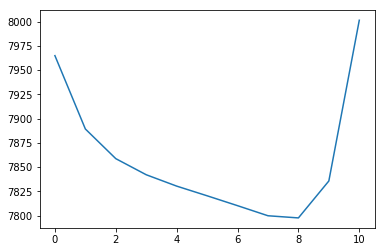

In [62]:
plotData(errors)

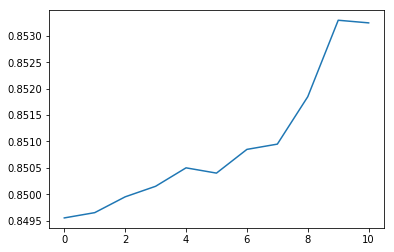

In [63]:
plotData(allAcc)

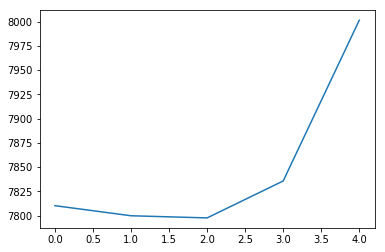

In [64]:
plotData(errors[6:])

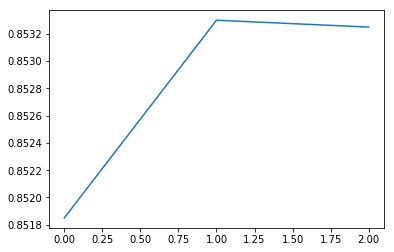

In [65]:
plotData(allAcc[8:])

In [66]:
W.size()

torch.Size([785, 10])

In [67]:
neurons=[]
for i in list(range(10)):
    temp=torch.squeeze(W[1:,[i]])
    temp=temp.view([28,28,1])
    mini=torch.min(temp)
    maxi=torch.max(temp)
    rang=maxi-mini
    temp=(temp-mini)/(rang)
    temp=temp*255
    temp=temp.type('torch.ByteTensor')
    neurons.append(temp)

In [68]:
neurons[1].size()

torch.Size([28, 28, 1])

In [69]:
test=neurons[4]
test

tensor([[[ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 68],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67]],

        [[ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 66],
         [ 65],
         [ 67],
         [ 70],
         [ 68],
         [ 67],
         [ 69],
         [ 64],
         [ 66],
         [ 68],
         [ 68],
         [ 68],
         [ 68],
         [ 65],
         [ 66],
         [ 69],
         [ 68],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67]],

        [[ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 67],
         [ 68],
    

In [70]:
#import torchvision.transforms as T
import torchvision as tv
to_pil = tv.transforms.ToPILImage()
def showImg(x):
    temp=x
    temp=temp.cpu().numpy()
    temp = to_pil(temp)
    plt.imshow(temp)

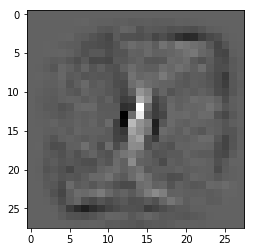

In [71]:
showImg(neurons[0])

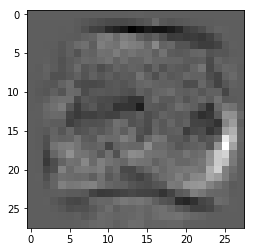

In [72]:
showImg(neurons[1])

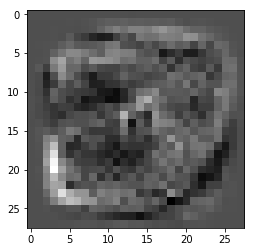

In [73]:
showImg(neurons[2])

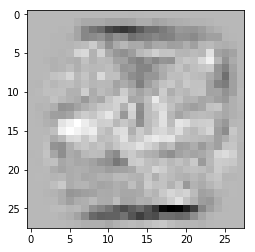

In [74]:
showImg(neurons[3])

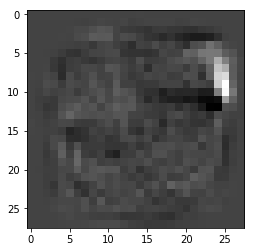

In [75]:
showImg(neurons[4])

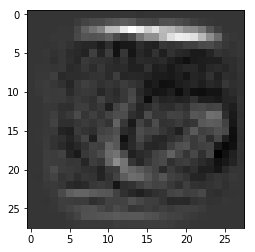

In [76]:
showImg(neurons[5])

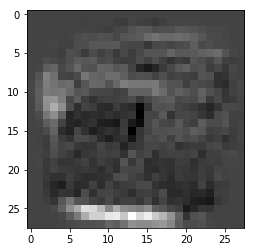

In [77]:
showImg(neurons[6])

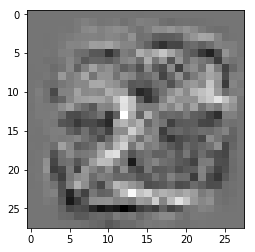

In [78]:
showImg(neurons[7])

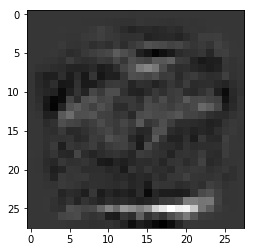

In [79]:
showImg(neurons[8])

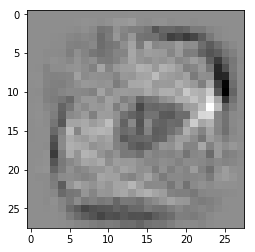

In [80]:
showImg(neurons[9])